[src](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MC-TD.pdf)

### Model-Free Prediction
* monte-carlo learning
* temporal-difference learning
* $TD(\lambda)$

* **note**: model free means we make no assumption about the env, and focus on eval the policy

## MonteCarlo RL
* learn directly from experience
* don't need to know transitions, just sampling
* learns from complete episodes, no bootstrap
* value = mean return
* caveat: can only apply MC to episodic MDP (meaning that the game has to end)

### MC policy eval
* goal: learn $v_\pi$ - $S_1, A_1, R_2, ..., S_k \sim \pi$
* return $G_t$ is discounted
* $v_\pi(S) = E_\pi [G_t | S_t = s]$
* MC uses empircal mean return instead of expected return

### First visit MC policy eval
* use the first time we visited a state
* for this state, we keep track of how many times we first visited, and the reward $G(t)$ afterwards
* $V(s) = S(s) / N(s)$
* $\lim_{N(s) -> \inf} V(s) -> v_\pi(s)$

### Every visit MC 
* every visit instead of first

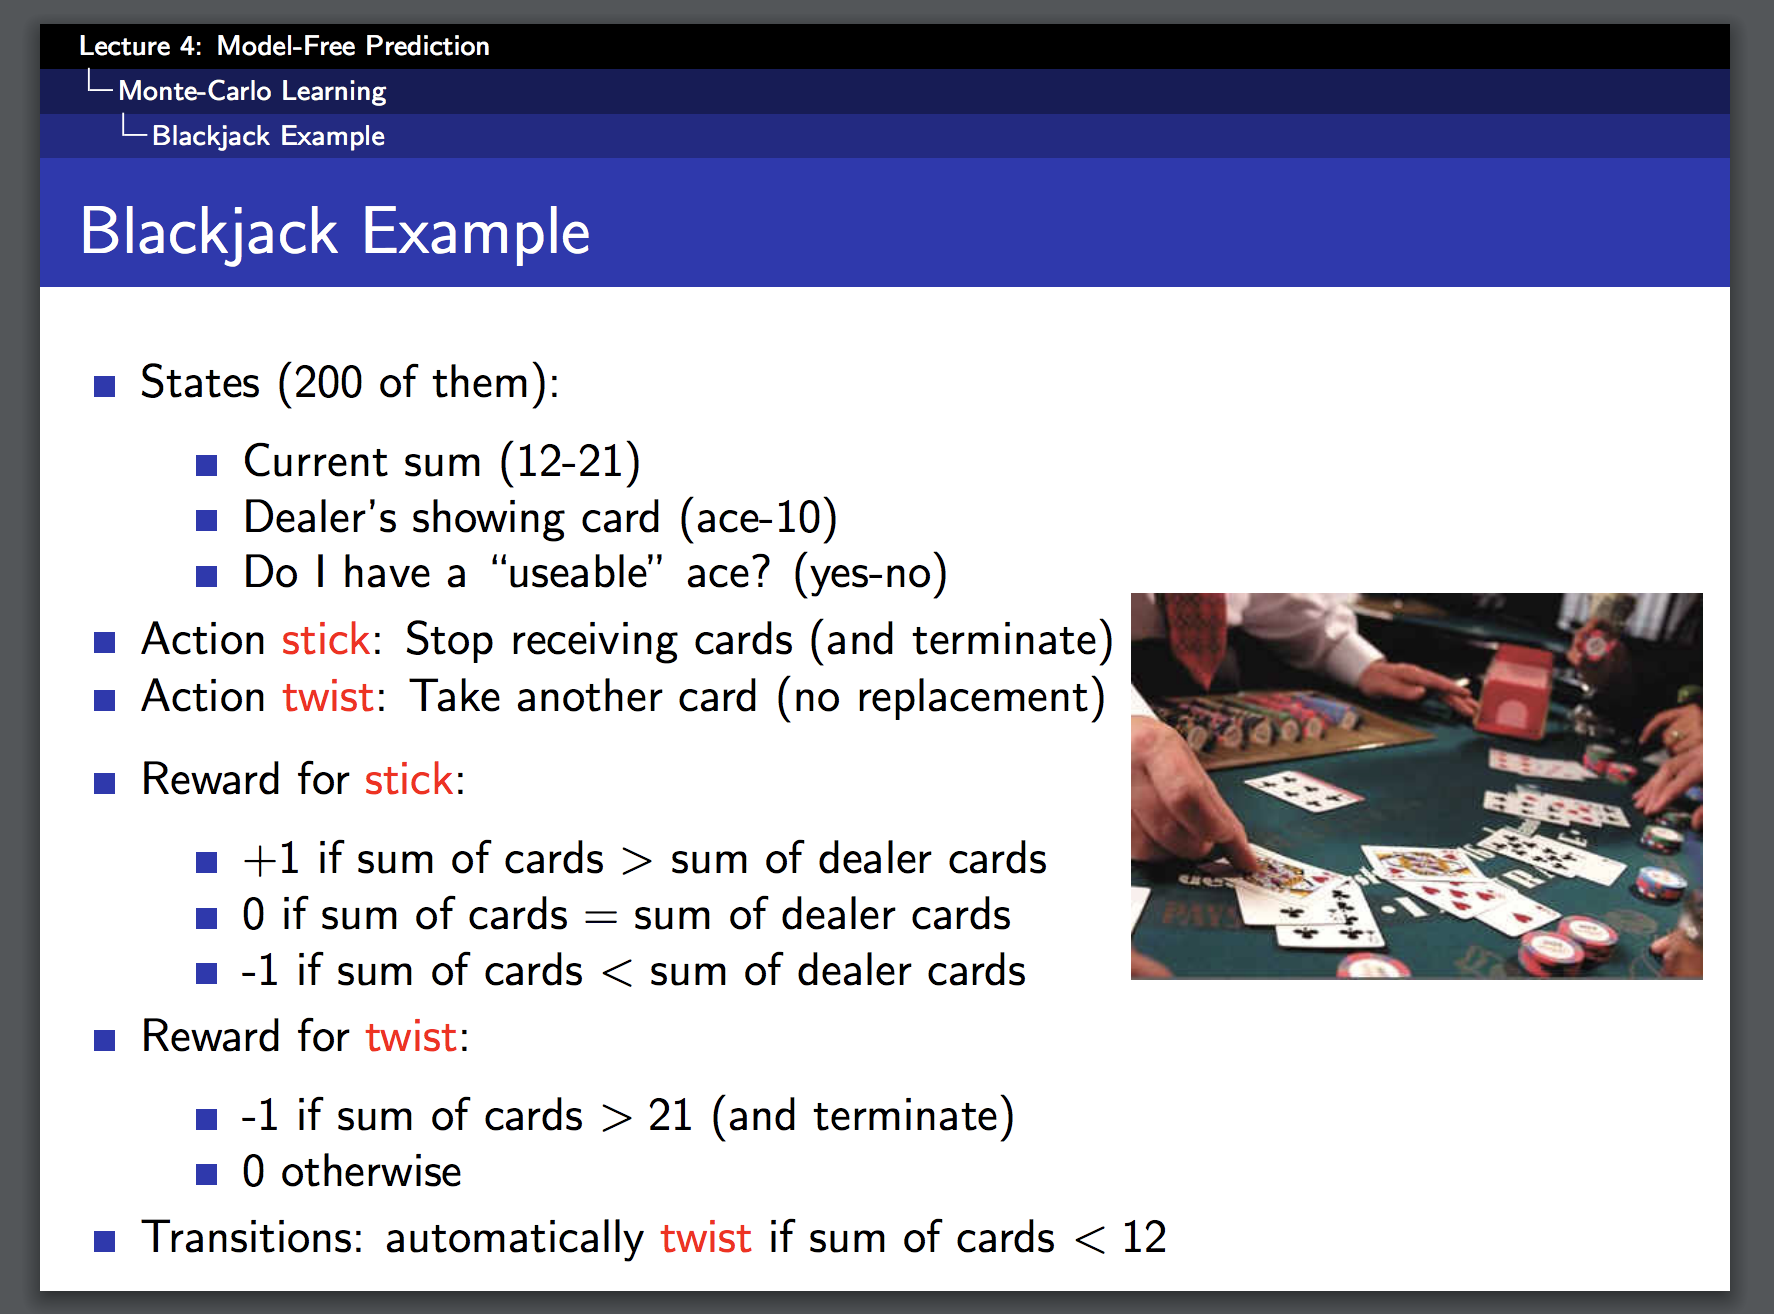

In [1]:
from IPython.display import Image
Image(filename='images/model_free_mc_blackjack.png') 

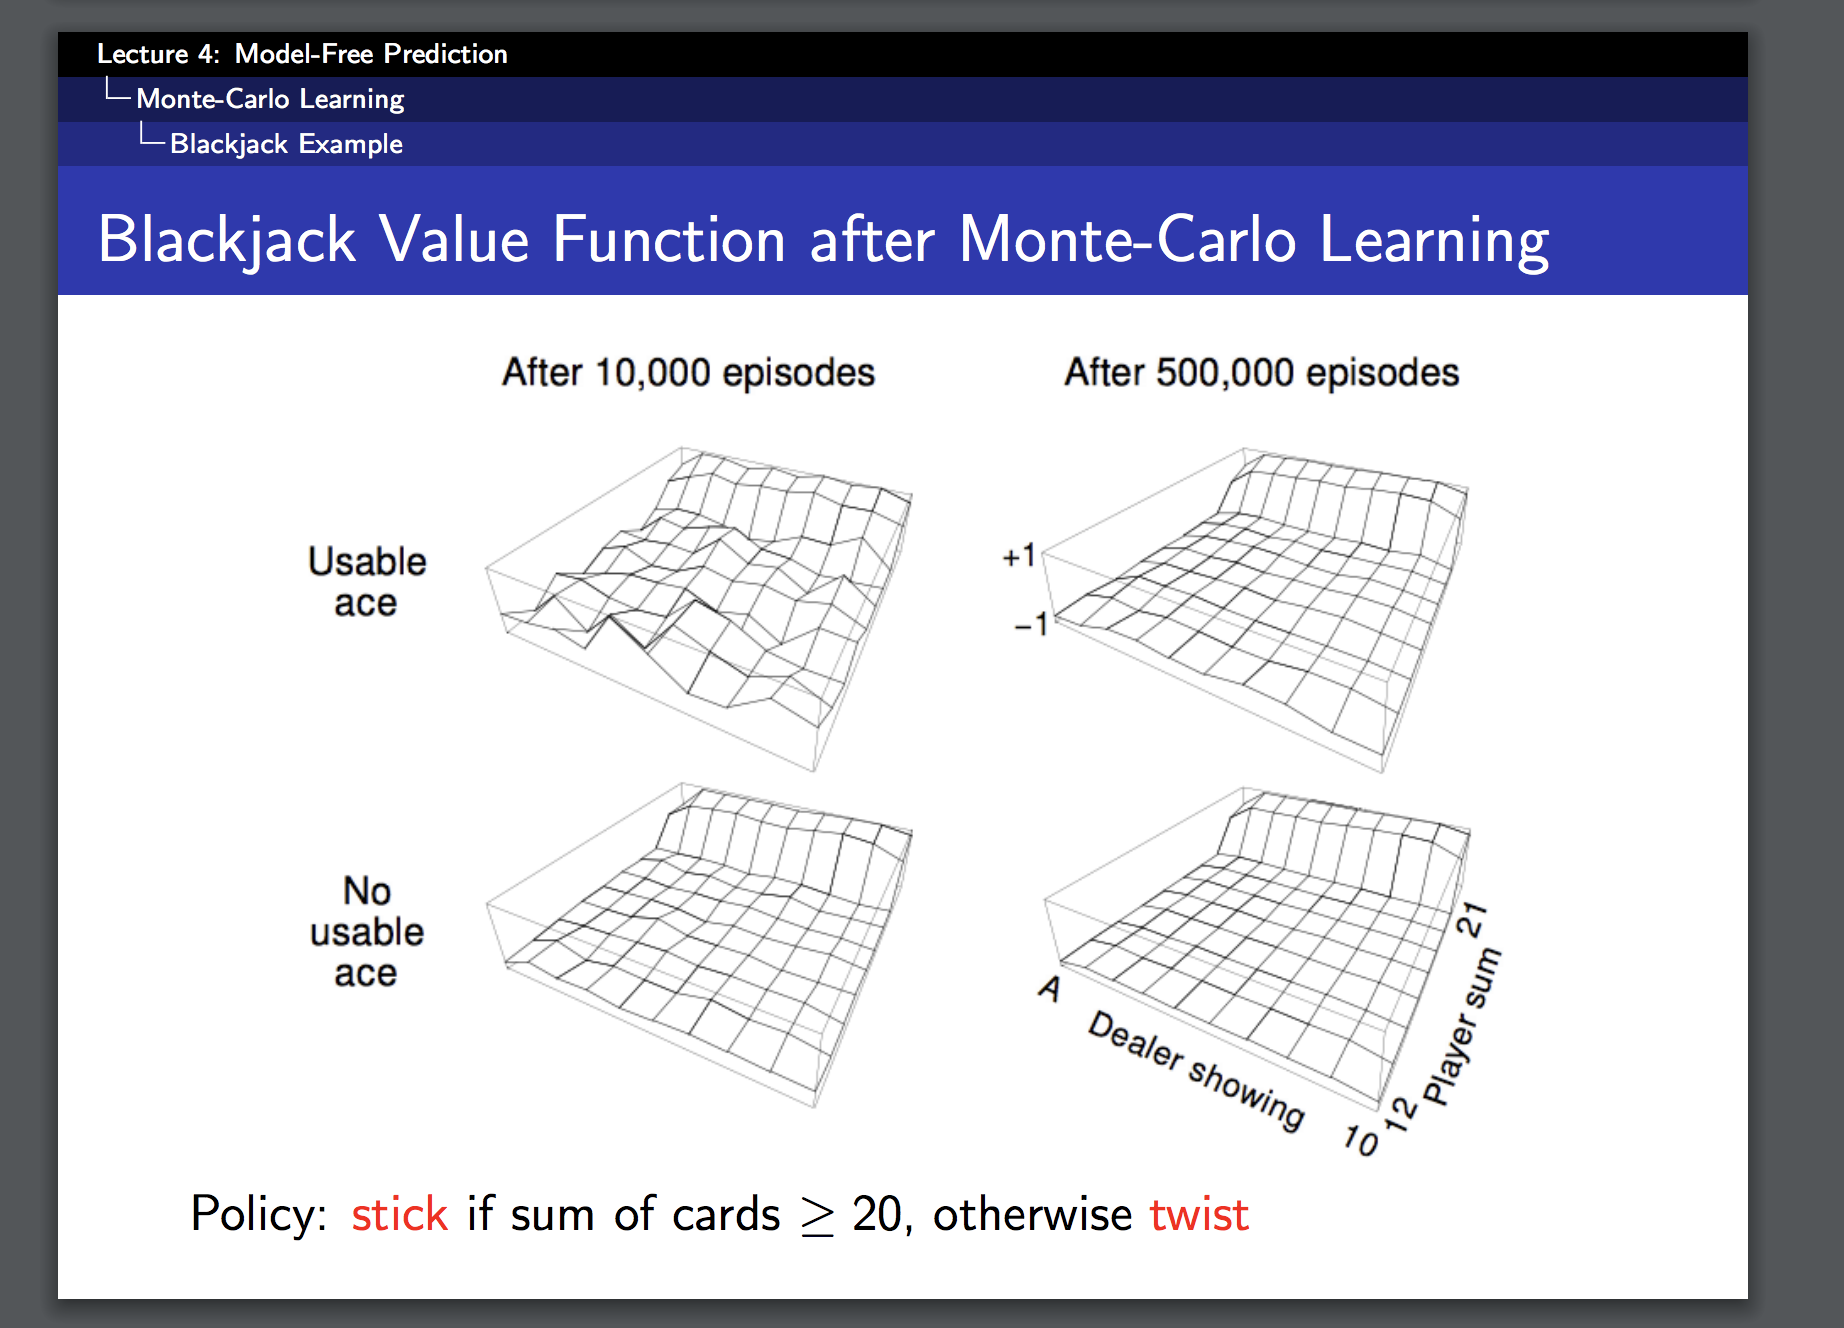

In [2]:
Image(filename='images/model_free_mc_blackjack2.png') 

### incremental MC update
* update $V(s)$ incrementally after episode
* incrementally update $S(s)$ and $N(s)$

## Temporal-Differencing
* learn directly from experience
* learn from incomplete episodes, from bootstrapping
* TD updates a guess towards a guess
* goal: learn $v_\pi$ online from experience under policy $\pi$
* $TD(0)$ - update value $V(S-t)$ towards estimated return from $R_{t+1} + \gamma V(S_{t+1})$
    * $V(S_t) = V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t))$
    * $R_{t+1} + \gamma V(S_{t+1})$ is called the TD target
    * $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$ is called the TD error

    

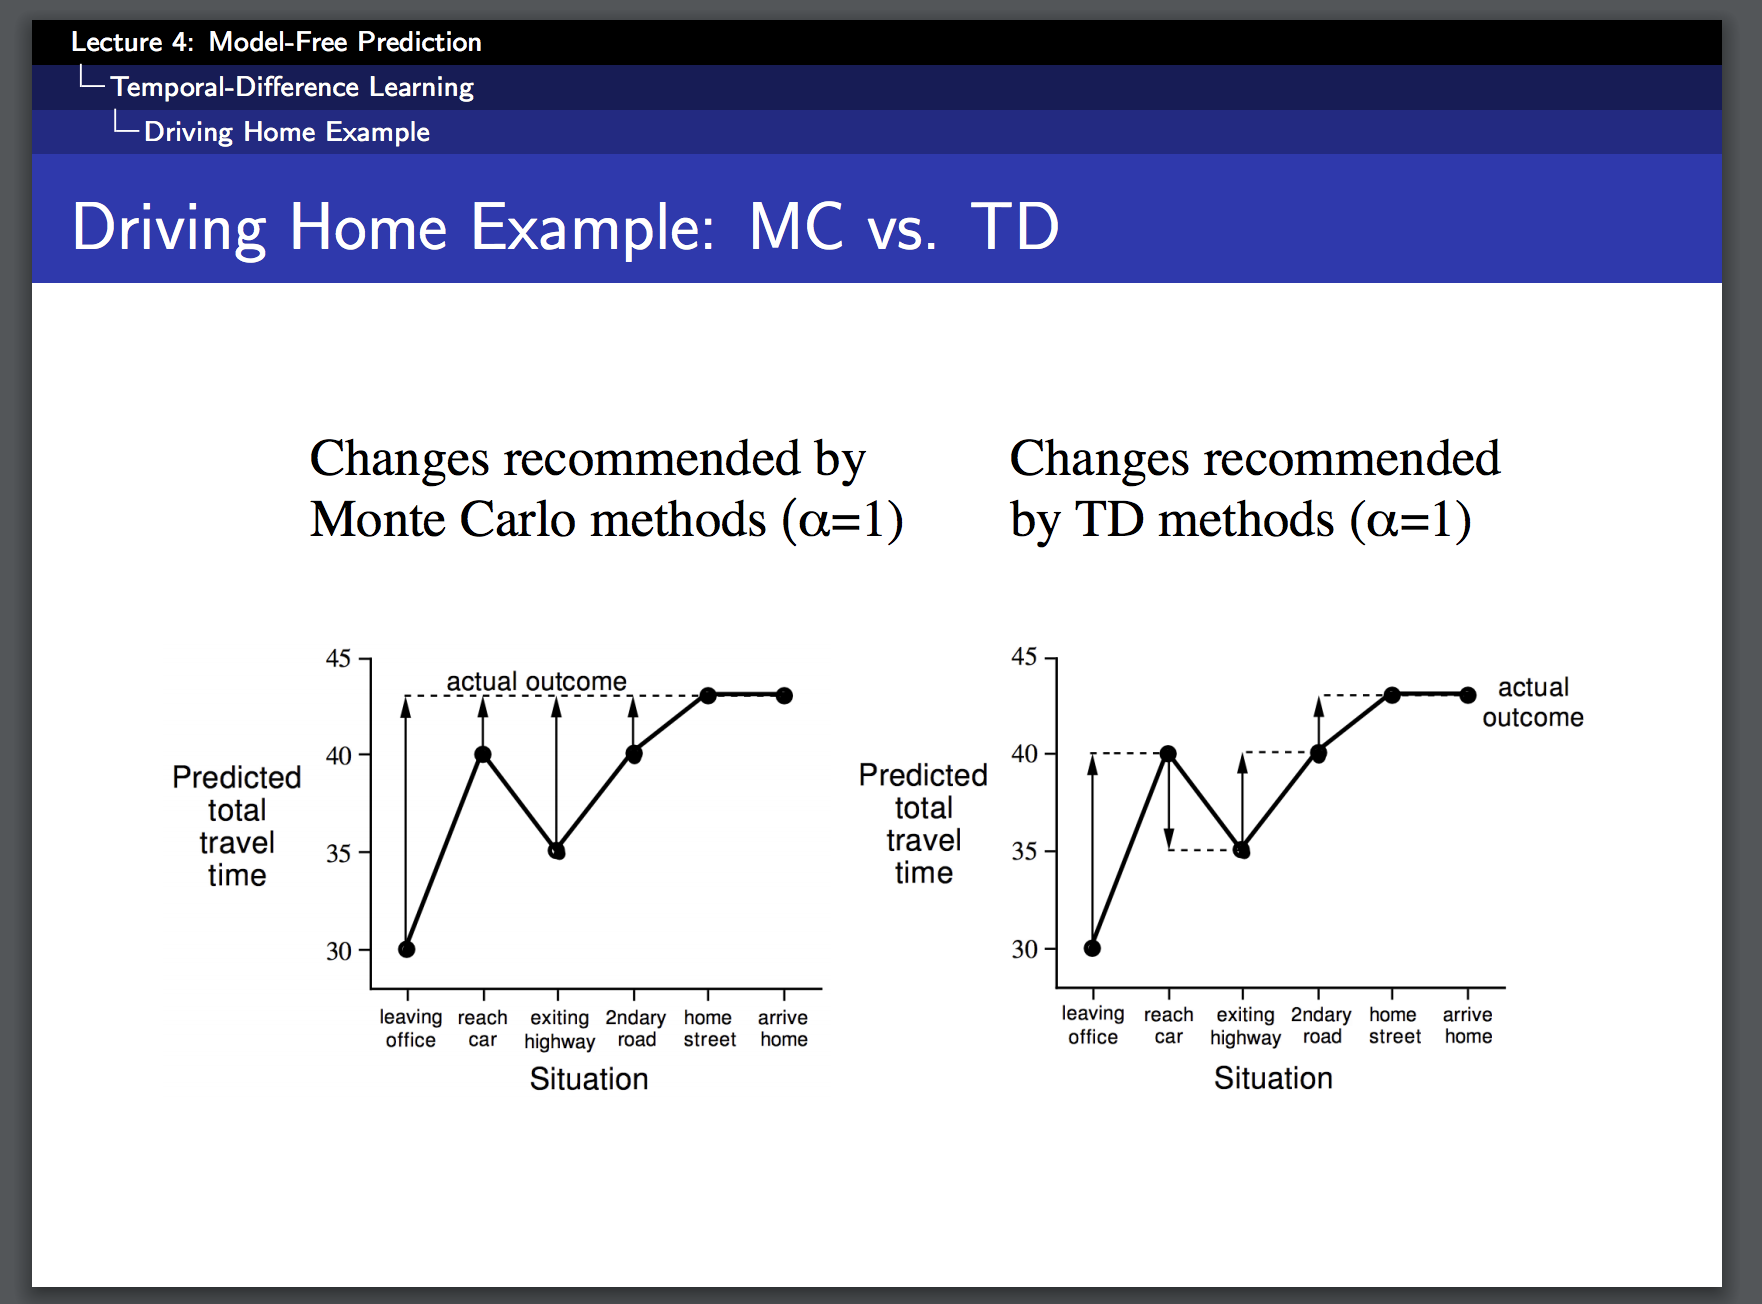

In [3]:
Image("images/model_free_td_vs_mc.png")

* TD is a biased estiamte $R_{t+1} + \gamma V(S_{t+1})$
* TD has lower variance
    * return depends on a lot more random actions
* MC minimizes MSE
* TD(0) converges to MLE of markov model
* TD exploits MDP structure; MC doesn't

### MonteCarlo backup
* $V(S_t) = V(S_t) + \alpha (G_t - V(S_t))$

## $TD(\lambda)$
* TD(0) - 1 step look ahead
    * TD(0) - TD(1) - TD(2) - TD(3) - ... TD(n) / or MC
* $G_t^2 = R_{t+1} + \gamma R_{t+2} + \gamma^2 V(S_{t+2})$
* n-step temporal-difference learning - $V(S_t) = V(S_t) + \alpha (G_t^{(n)} - V(S_t))$

### lambda-return
* $\lambda$ return $G_t^\lambda $ combines all n-step returns $G_t^{(n)}$
* using weight $(1-\lambda) \lambda^{n-1}$
* $G_t^\lambda = (1-\lambda) \sum_{n=1}^\inf \lambda^{n-1} G_t^{(n)}$
* use geometric because it's memoryless...

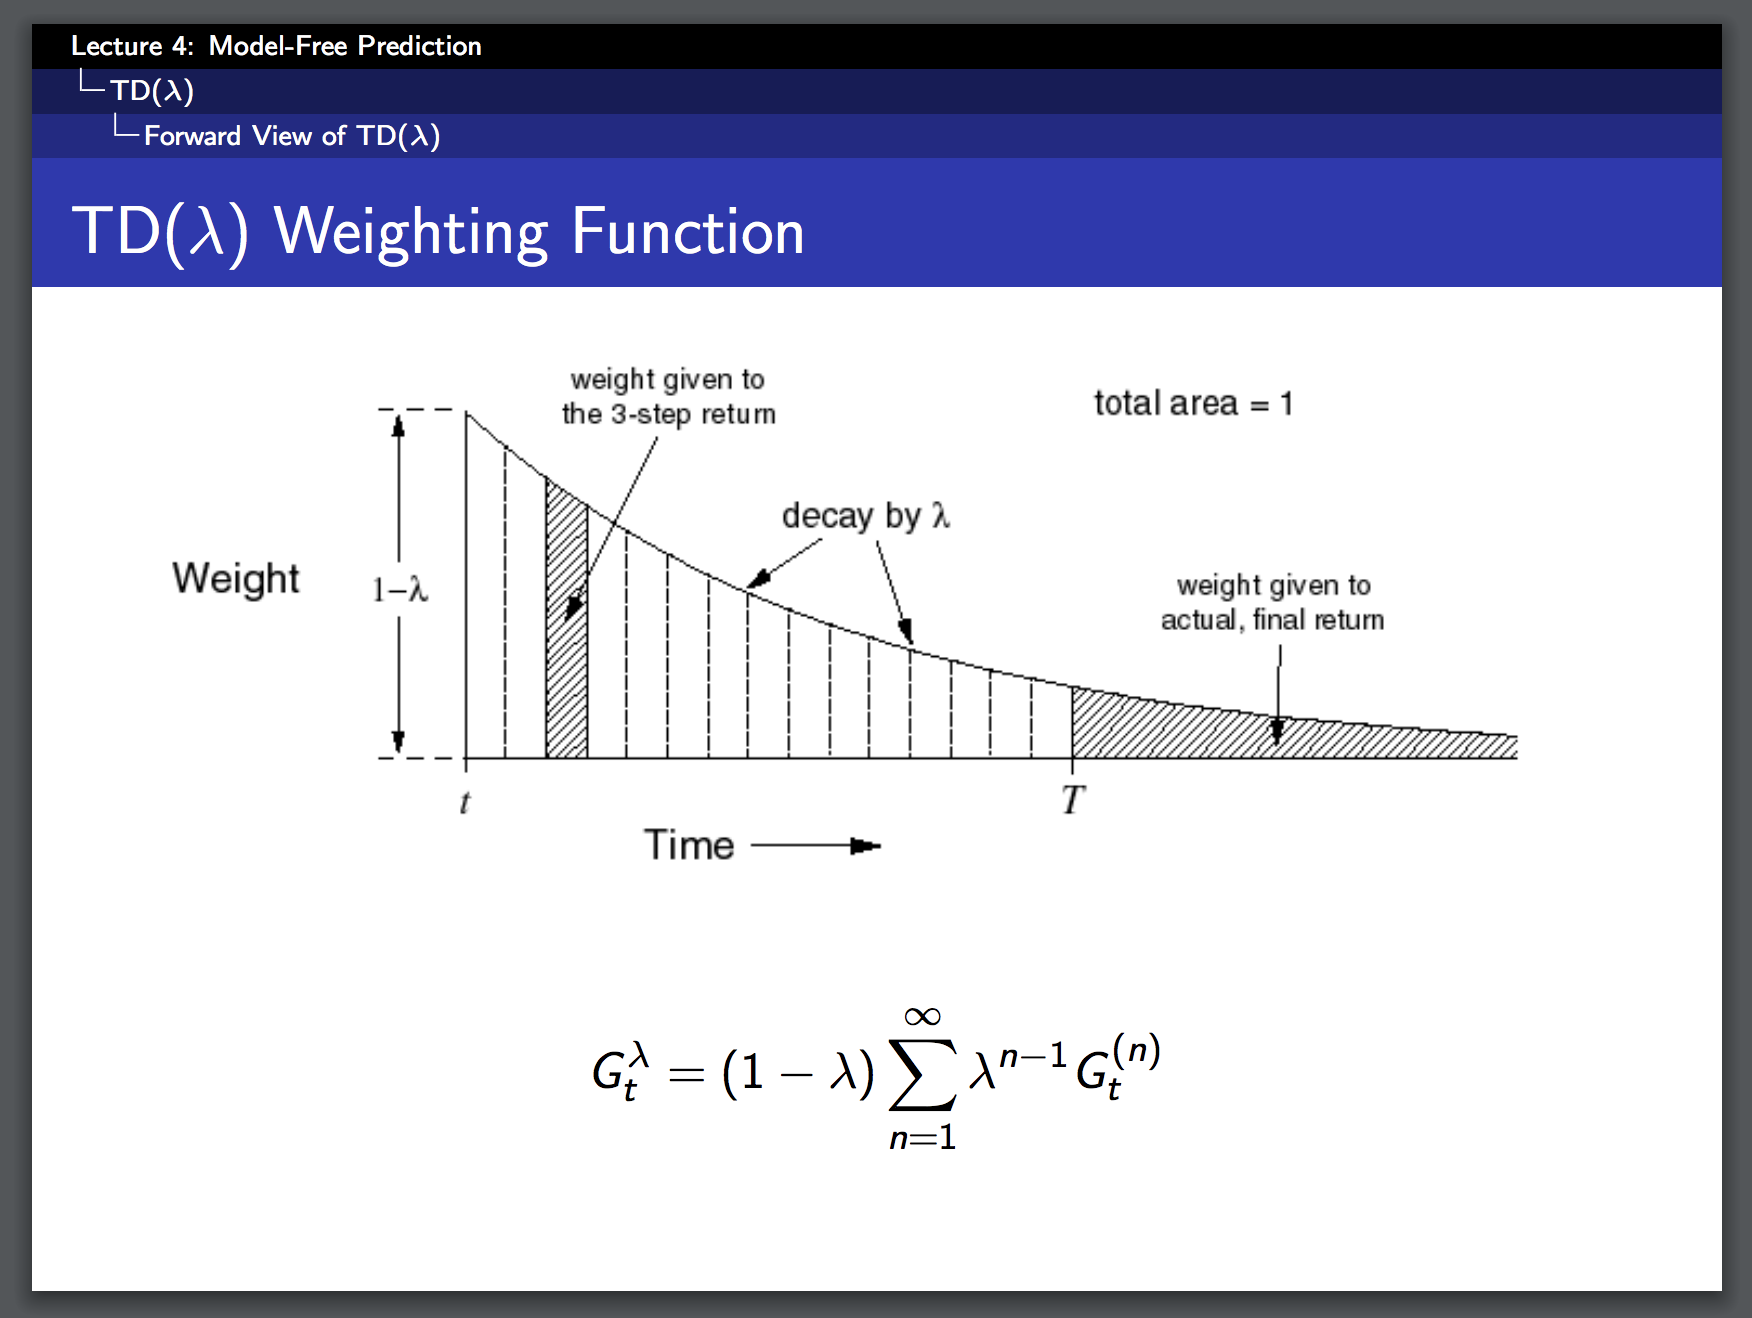

In [4]:
Image("images/model_free_td_lambda.png")

### eligibility traces
* $E_0(S) = 0$
* $E_t(S) = \gamma \lambda E_{t-1} (s) + 1 (S_t=s)$

* backward view of $TD(\lambda)$ 
    * $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$
    * $V(S) = V(s) + \alpha \delta_t E_t(S)$
* here the error is broadcasted back! 